In [1]:
from random import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Untuk Membaca data dari host file
file_path = "../Progress_Proposal_THT/data_THT_transform_tanpa_mimisanFrek.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

suhu  hidung_terseumbat  pilek  suara_serak  nyeri_membuka_mulut  \
0     2                  0      0            0                    0   
1     1                  0      0            0                    0   
2     2                  0      0            0                    0   
3     2                  0      0            0                    0   
4     1                  0      0            0                    0   

   nyeri_kepala  vertigo  hidung_nyeri  blkng_hidng_ganjal  \
0             0        0             0                   0   
1             0        0             0                   0   
2             0        0             0                   0   
3             0        0             0                   0   
4             0        0             0                   0   

   nyeri_telan_tenggorokan  ...  badan_lemas  berat_badan  usia  mual  muntah  \
0                        1  ...            0            0     1     0       0   
1                        1  ...            0            0     0     0       0   
2                        1  ...            0            0     1     0       0   
3                        1  ...            0            0     2     0       0   
4                        1  ...            0            0     1     1       0   

   telinga   hidung  tenggorok  leher    hasil_diagn  
0         0       0          6      0  tonsilitsakut  
1         0       0          1      0  tonsilitsakut  
2         0       0          4      0  tonsilitsakut  
3         0       0          6      0  tonsilitsakut  
4         0       0          1      0  tonsilitsakut  

[5 rows x 59 columns]

In [4]:
df["hasil_diagn"].value_counts()


hasil_diagn
laringitisakut            33
tonsilitsakut             32
rhinitis_alergi           32
serumen_obsturans         32
faringitis_akut           31
ruptur_membran_timpani    30
othematome                30
parotitis                 30
laringofaringealreflux    30
karsinoma_nasofaring      30
korpus_alenium_hidung     30
prebiakusis               30
barotrauma                30
bppv                      30
otisis_media_kronis       30
rhinitis_akut             30
meniere_disease           30
vestibulitis              30
perichondritis            30
sinusitis                 30
otisis_eksterna           30
otisis_media_akut         30
karsinoma_laring          30
Name: count, dtype: int64

In [5]:
df["hasil_diagn"].value_counts().sum()

700

In [6]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [7]:
#VISUALISASI
vis_df = pd.read_excel(file_path)
vis_df.columns = ['suhu', 'hidung tersumbat', 'pilek', 'suara serak', 'nyeri membuka mulut', 'nyeri kepala', 'vertigo', 'hidung nyeri', 
                  'belakang hidung ganjal', 'nyeri telan tenggorokan', 'batuk', 'nyeri telinga', 'gangguan dengar', 'cairan telinga', 'leher bengkak',
                  'mata gatal', 'telinga kemerahan', 'hidung kemerahan', 'telinga bengkak', 'hidung bengkak', 'telinga nmendengung', 'telinga gatal',
                  'keringat dingin', 'tenggorokan kering', 'tenggorokan gatal', 'kepala berat', 'telinga berat', 'bersin', 'gendang telinga lubang',
                  'telinga berair/kemasukan_air', 'telinga penuh/tertutup/tersumbat', 'pusing', 'mimisan', 'tenggorokan_ganjal', 
                  'tenggorokan_panas', 'hidung_keluar_ingus', 'kekentalan_ingus', 'sesak_nafas', 'bersendawa', 'berdehem', 'kembung', 'mulut_pahit',
                  'mulut_bau', 'mulut_kering', 'pandangan', 'mata_juling', 'nafsu_makan', 'pipi_bengkak', 'pipi_nyeri', 'badan_lemas', 'berat_badan', 
                  'usia','mual', 'muntah', 'telinga', 'hidung', 'tenggorok', 'leher',
                  'Diagnosis']

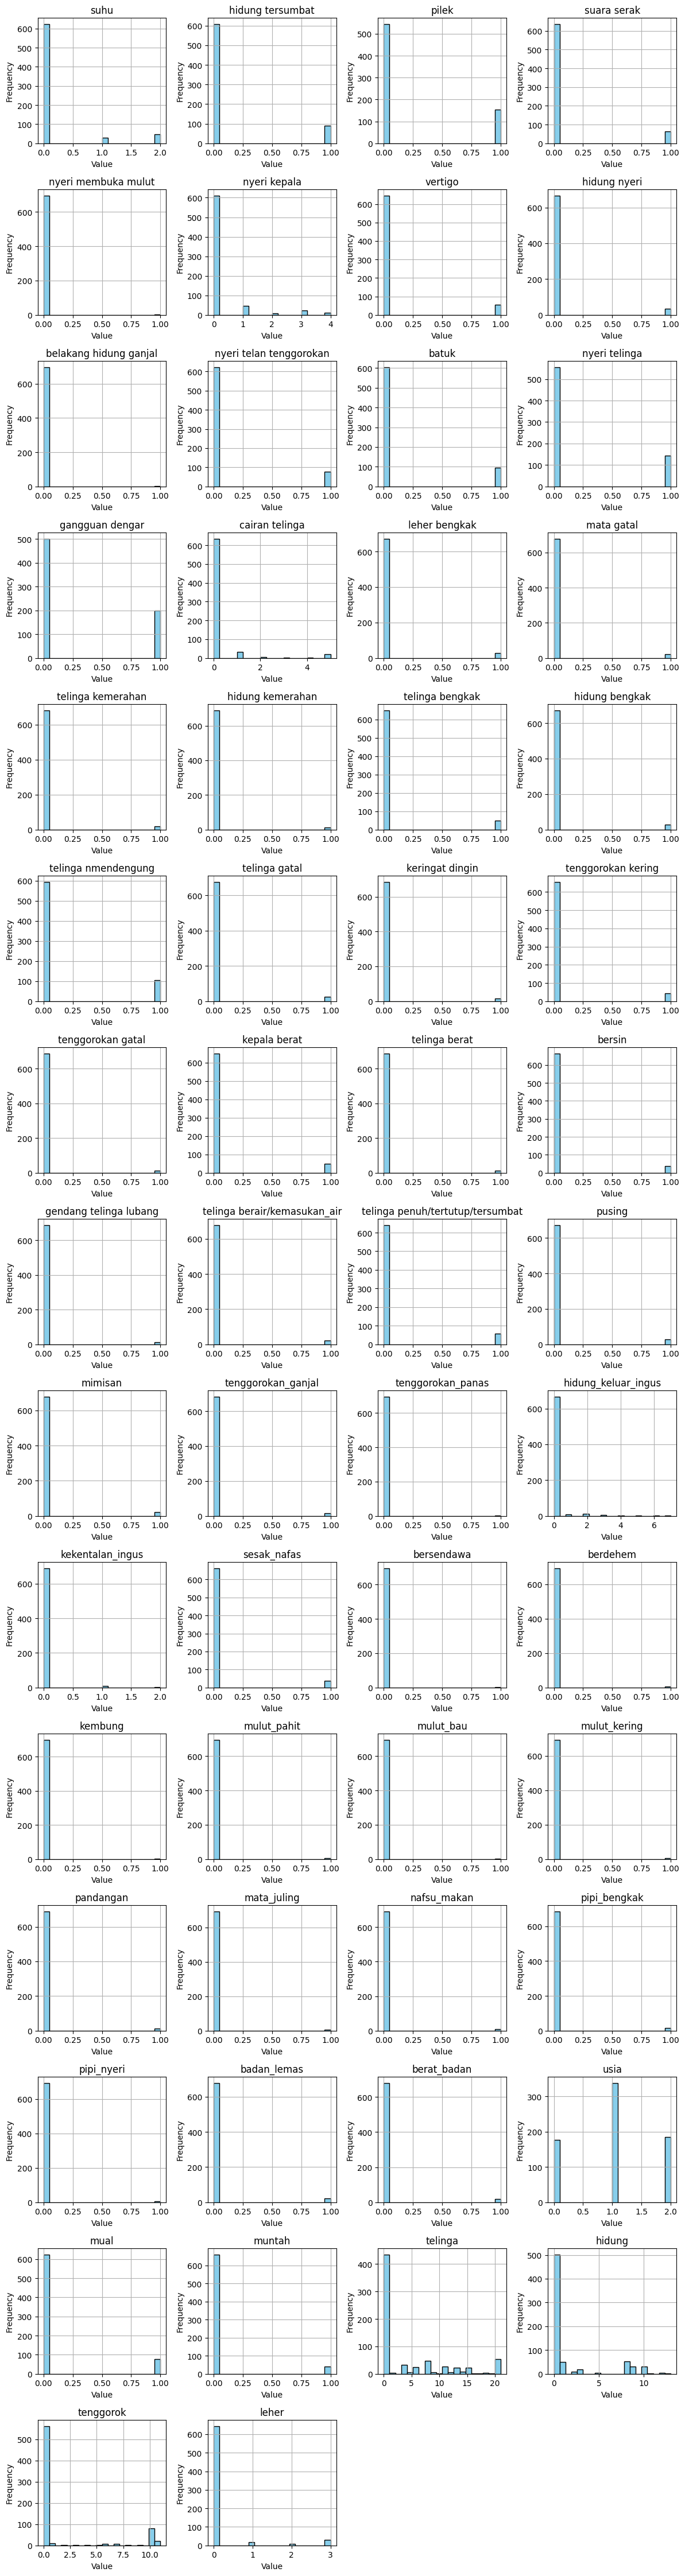

In [8]:
# List of feature columns
feature_columns = vis_df.columns[:-1]  # tidak memakai kolom terakhir karena diagnosis

# Calculate the number of rows and columns for subplots
num_features = len(feature_columns)
num_rows = (num_features + 3) // 4  # Calculate the number of rows (ceil(num_features / 4))
num_cols = min(num_features, 4)     # Number of columns is at most 4

# Plotting the distribution of each feature
plt.figure(figsize=(12, 3 * num_rows))

for i, feature in enumerate(feature_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Adjust the subplot layout as per your number of features
    vis_df[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
df.dtypes

suhu                                 int64
hidung_terseumbat                    int64
pilek                                int64
suara_serak                          int64
nyeri_membuka_mulut                  int64
nyeri_kepala                         int64
vertigo                              int64
hidung_nyeri                         int64
blkng_hidng_ganjal                   int64
nyeri_telan_tenggorokan              int64
batuk                                int64
nyeri_tlinga                         int64
gangguan_dengar                      int64
cairan_telinga                       int64
leher_bengkak                        int64
mata_gatal                           int64
telinga_kemerahan                    int64
hidung_kemerahan                     int64
telinga_bengkak                      int64
hidung_bengkak                       int64
telinga_mendengung                   int64
telinga_gatal                        int64
keringat_dingin                      int64
tenggorokan

In [9]:
df.dtypes.count() #total 59 - hasil diagnosis = 58 (gejala)

59

In [10]:
missing_values = df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

# Check if there are any missing values in the DataFrame
if missing_values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Columns with missing values:
[]
There are no missing values in the DataFrame.


In [11]:
#1X SAJA
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels into numeric values
df['hasil_diagn_encoded'] = label_encoder.fit_transform(df['hasil_diagn'])

# Check the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

# Now you have a new column 'hasil_diagn_encoded' containing numeric representations of the labels
# You can drop the original 'hasil_diagn' column if you don't need it anymore
df.drop(columns=['hasil_diagn'], inplace=True)

Label Mapping: {'barotrauma': 0, 'bppv': 1, 'faringitis_akut': 2, 'karsinoma_laring': 3, 'karsinoma_nasofaring': 4, 'korpus_alenium_hidung': 5, 'laringitisakut': 6, 'laringofaringealreflux': 7, 'meniere_disease': 8, 'othematome': 9, 'otisis_eksterna': 10, 'otisis_media_akut': 11, 'otisis_media_kronis': 12, 'parotitis': 13, 'perichondritis': 14, 'prebiakusis': 15, 'rhinitis_akut': 16, 'rhinitis_alergi': 17, 'ruptur_membran_timpani': 18, 'serumen_obsturans': 19, 'sinusitis': 20, 'tonsilitsakut': 21, 'vestibulitis': 22}


In [12]:
for key, values in label_mapping.items():
    print(key)

barotrauma
bppv
faringitis_akut
karsinoma_laring
karsinoma_nasofaring
korpus_alenium_hidung
laringitisakut
laringofaringealreflux
meniere_disease
othematome
otisis_eksterna
otisis_media_akut
otisis_media_kronis
parotitis
perichondritis
prebiakusis
rhinitis_akut
rhinitis_alergi
ruptur_membran_timpani
serumen_obsturans
sinusitis
tonsilitsakut
vestibulitis


In [13]:
# Example: Inverse transform to get original labels from encoded values
original_labels = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15])  # Replace [0, 1, 2] with your encoded values
print("Original Labels:", original_labels)

Original Labels: ['barotrauma' 'bppv' 'faringitis_akut' 'karsinoma_laring'
 'karsinoma_nasofaring' 'korpus_alenium_hidung' 'laringitisakut'
 'laringofaringealreflux' 'meniere_disease' 'othematome' 'otisis_eksterna'
 'otisis_media_akut' 'otisis_media_kronis' 'parotitis' 'perichondritis'
 'prebiakusis']


In [14]:
# Assuming the last column is the label/target column
X = df.drop("hasil_diagn_encoded", axis = 1)  # Features
y = df['hasil_diagn_encoded']   # Labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #1234
)

In [15]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [16]:
# Splitting the data into training and testing sets while maintaining the same proportion of classes
StratX_train, StratX_test, Straty_train, Straty_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
StratX_train3, StratX_test3, Straty_train3, Straty_test3 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
StratX_train4, StratX_test4, Straty_train4, Straty_test4 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [17]:
X_test

suhu  hidung_terseumbat  pilek  suara_serak  nyeri_membuka_mulut  \
158     0                  0      0            0                    0   
500     0                  0      0            0                    0   
396     0                  1      1            0                    0   
155     0                  0      0            0                    0   
321     0                  0      0            0                    0   
..    ...                ...    ...          ...                  ...   
24      2                  0      0            0                    0   
218     0                  0      0            0                    0   
431     0                  0      0            0                    0   
281     0                  0      1            0                    0   
110     0                  0      0            0                    0   

     nyeri_kepala  vertigo  hidung_nyeri  blkng_hidng_ganjal  \
158             0        0             0                   0   
500             0        0             0                   0   
396             1        0             0                   0   
155             0        0             0                   0   
321             0        1             0                   0   
..            ...      ...           ...                 ...   
24              0        0             0                   0   
218             0        0             0                   0   
431             0        0             0                   0   
281             0        0             1                   0   
110             0        0             0                   0   

     nyeri_telan_tenggorokan  ...  pipi_nyeri  badan_lemas  berat_badan  usia  \
158                        0  ...           0            0            0     1   
500                        0  ...           0            0            0     2   
396                        0  ...           0            1            0     1   
155                        0  ...           0            0            0     0   
321                        0  ...           0            0            0     1   
..                       ...  ...         ...          ...          ...   ...   
24                         1  ...           0            0            0     0   
218                        0  ...           0            0            0     1   
431                        0  ...           0            0            0     1   
281                        0  ...           0            0            0     1   
110                        1  ...           0            0            0     1   

     mual  muntah  telinga   hidung  tenggorok  leher  
158     0       0         4       0          0      0  
500     0       0         0       0          0      0  
396     0       0         0       1          0      0  
155     0       0         4       0          0      0  
321     1       1         0       0          0      0  
..    ...     ...       ...     ...        ...    ...  
24      0       0         0       0          6      0  
218     0       0        11       0          0      0  
431     0       0        15       0          0      0  
281     0       0         0       9          0      0  
110     0       0         0       0         10      0  

[140 rows x 58 columns]

In [18]:
X2 = df.drop("hasil_diagn_encoded", axis = 1).values  # Features ke np array
y2 = df['hasil_diagn_encoded'].values   # Labels ke np array

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42 #1234
)

In [19]:
print("Data Trainning : ", X_train.head())

print("Data Testing :", X_test.head())

Data Trainning :       suhu  hidung_terseumbat  pilek  suara_serak  nyeri_membuka_mulut  \
82      0                  1      1            0                    0   
51      0                  0      0            1                    0   
220     0                  1      1            0                    0   
669     0                  0      0            0                    0   
545     0                  0      1            0                    0   

     nyeri_kepala  vertigo  hidung_nyeri  blkng_hidng_ganjal  \
82              0        0             0                   0   
51              0        0             0                   0   
220             2        0             0                   0   
669             0        0             0                   0   
545             0        0             0                   0   

     nyeri_telan_tenggorokan  ...  pipi_nyeri  badan_lemas  berat_badan  usia  \
82                         0  ...           0            0            0     2

In [20]:
from sklearn.ensemble import RandomForestClassifier
#'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 512
forest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9571428571428572

In [21]:
forest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest3.fit(X_train3, y_train3)
forest3.score(X_test3, y_test3)

0.9523809523809523

In [22]:
forest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
forest4.fit(X_train4, y_train4)
forest4.score(X_test4, y_test4)

0.9321428571428572

In [23]:
Stratforest = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest.fit(StratX_train, Straty_train)
Stratforest.score(StratX_test, Straty_test)

0.9714285714285714

In [24]:
Stratforest3 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest3.fit(StratX_train3, Straty_train3)
Stratforest3.score(StratX_test3, Straty_test3)

0.9714285714285714

In [25]:
Stratforest4 = RandomForestClassifier(criterion="entropy", n_estimators=512, min_samples_split=9, min_samples_leaf=1, max_depth=21, max_features='sqrt')
Stratforest4.fit(StratX_train4, Straty_train4)
Stratforest4.score(StratX_test4, Straty_test4)

0.9571428571428572

In [44]:
y_pred = Stratforest.predict(StratX_test)
print(y_pred)

[ 7 16  8 10 22 17  7 20  1  0 22 20  4  1 19 11  9 21  5  1 19  0  2 13
  0 19 15  6 18  7 14  6  3 11  6 12 11 14  5  8  3  9 19 20  6 21  2  3
 17  5 11 16 10 20  5 16 12  6 18 20  8 11 18 13  9  9 14 12  1  8 22 12
  5  1 16  0  8 15  1 21  0 18 16 22 10  7 12 21  2  3  6  2 16 15  7 18
 22  4  5 10 13  9  8 14 15  2 15  0 19 19 17  9 21 15 14  3 20 17 13 13
 11  2 13 18  4  4  3 17 14  4 14  4 17 21  2 14 22 21  6 11]


In [45]:
y_pred3 = Stratforest3.predict(StratX_test3)

In [46]:
y_pred4 = Stratforest4.predict(StratX_test4)

In [29]:
importances = forest.feature_importances_ #mendapatkan prosentasi feature terpenting

plt.figure(figsize=(12, 8))
indices = np.argsort(importances)[::-1] #ascending atas ke bawah 1# tertinggi -> last# terendah
plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = vis_df.columns[:-1]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=900)
plt.show()

In [ ]:
# Fungsi confusion matrix
# def conf(y_true, y_pred) :
#     cm = confusion_matrix

In [30]:
def confusion_matrix(y_true, y_pred, labels):
    matrix = [[0 for _ in range(len(labels))] for _ in range(len(labels))]
    
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    
    return matrix

def plot_confusion_matrix(matrix, labels):
    print("\nConfusion Matrix:")
    for row in matrix:
        print(row)
    
    print("\nConfusion Matrix (Normalized):")
    total_samples = sum(sum(row) for row in matrix)
    for i, row in enumerate(matrix):
        row_total = sum(row)
        normalized_row = ["{:.2f}".format(val/row_total) if row_total != 0 else "0.00" for val in row]
        print(normalized_row)
    
    print("\nPlotting Confusion Matrix:")
    for i, row in enumerate(matrix):
        for j, val in enumerate(row):
            print(val, end=" ")
        print()

# Calculate confusion matrix
matrix = confusion_matrix(y_test, y_pred, np.unique(y_test))

# Plot confusion matrix
plot_confusion_matrix(matrix, np.unique(y_test))



Confusion Matrix:
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[

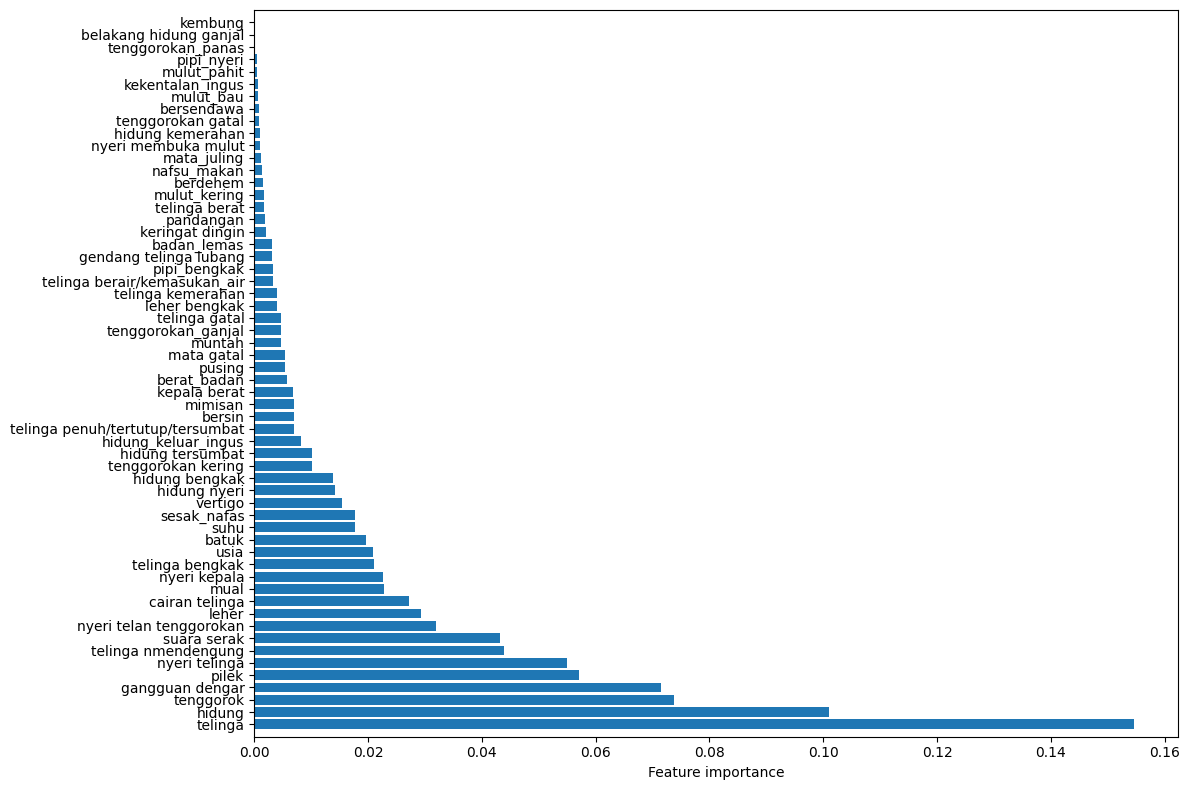

In [31]:
importances = forest.feature_importances_  # Get feature importances

plt.figure(figsize=(12, 8))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]  # Highest -> Last, Lowest -> First

plt.xlabel('Feature importance')  # Change to xlabel as it's now the feature importance
plt.barh(range(X_train.shape[1]),  # Change to barh for horizontal bar plot
         importances[indices],
         align='center')

feat_labels = vis_df.columns[:-1]
plt.yticks(range(X_train.shape[1]),  # Change to yticks
           feat_labels[indices], rotation=0)  # Rotate labels horizontally

plt.ylim([-1, X_train.shape[1]])  # Change to ylim for y-axis limit

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=600)
plt.show()


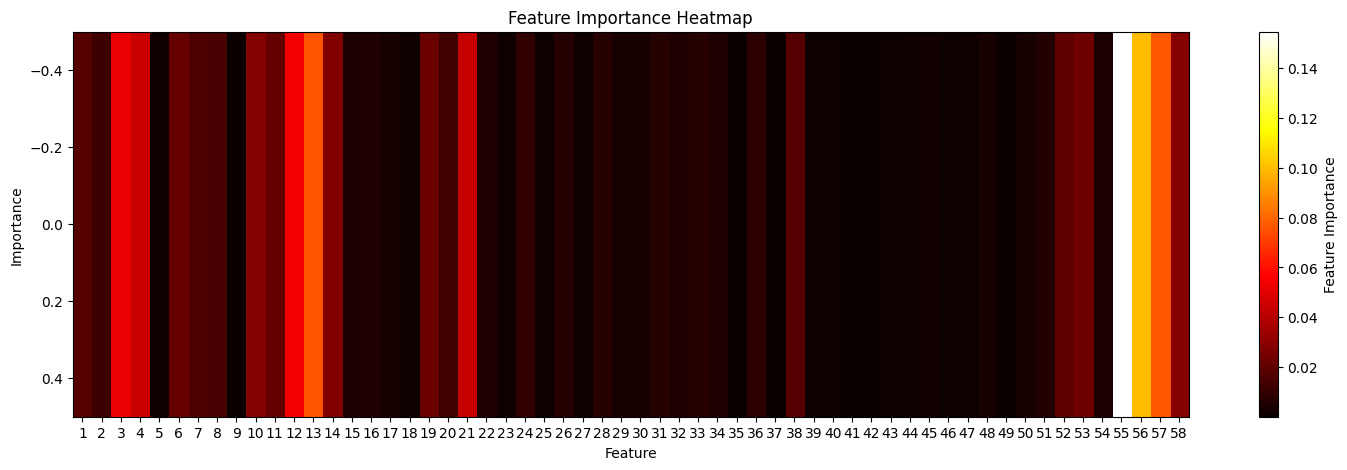

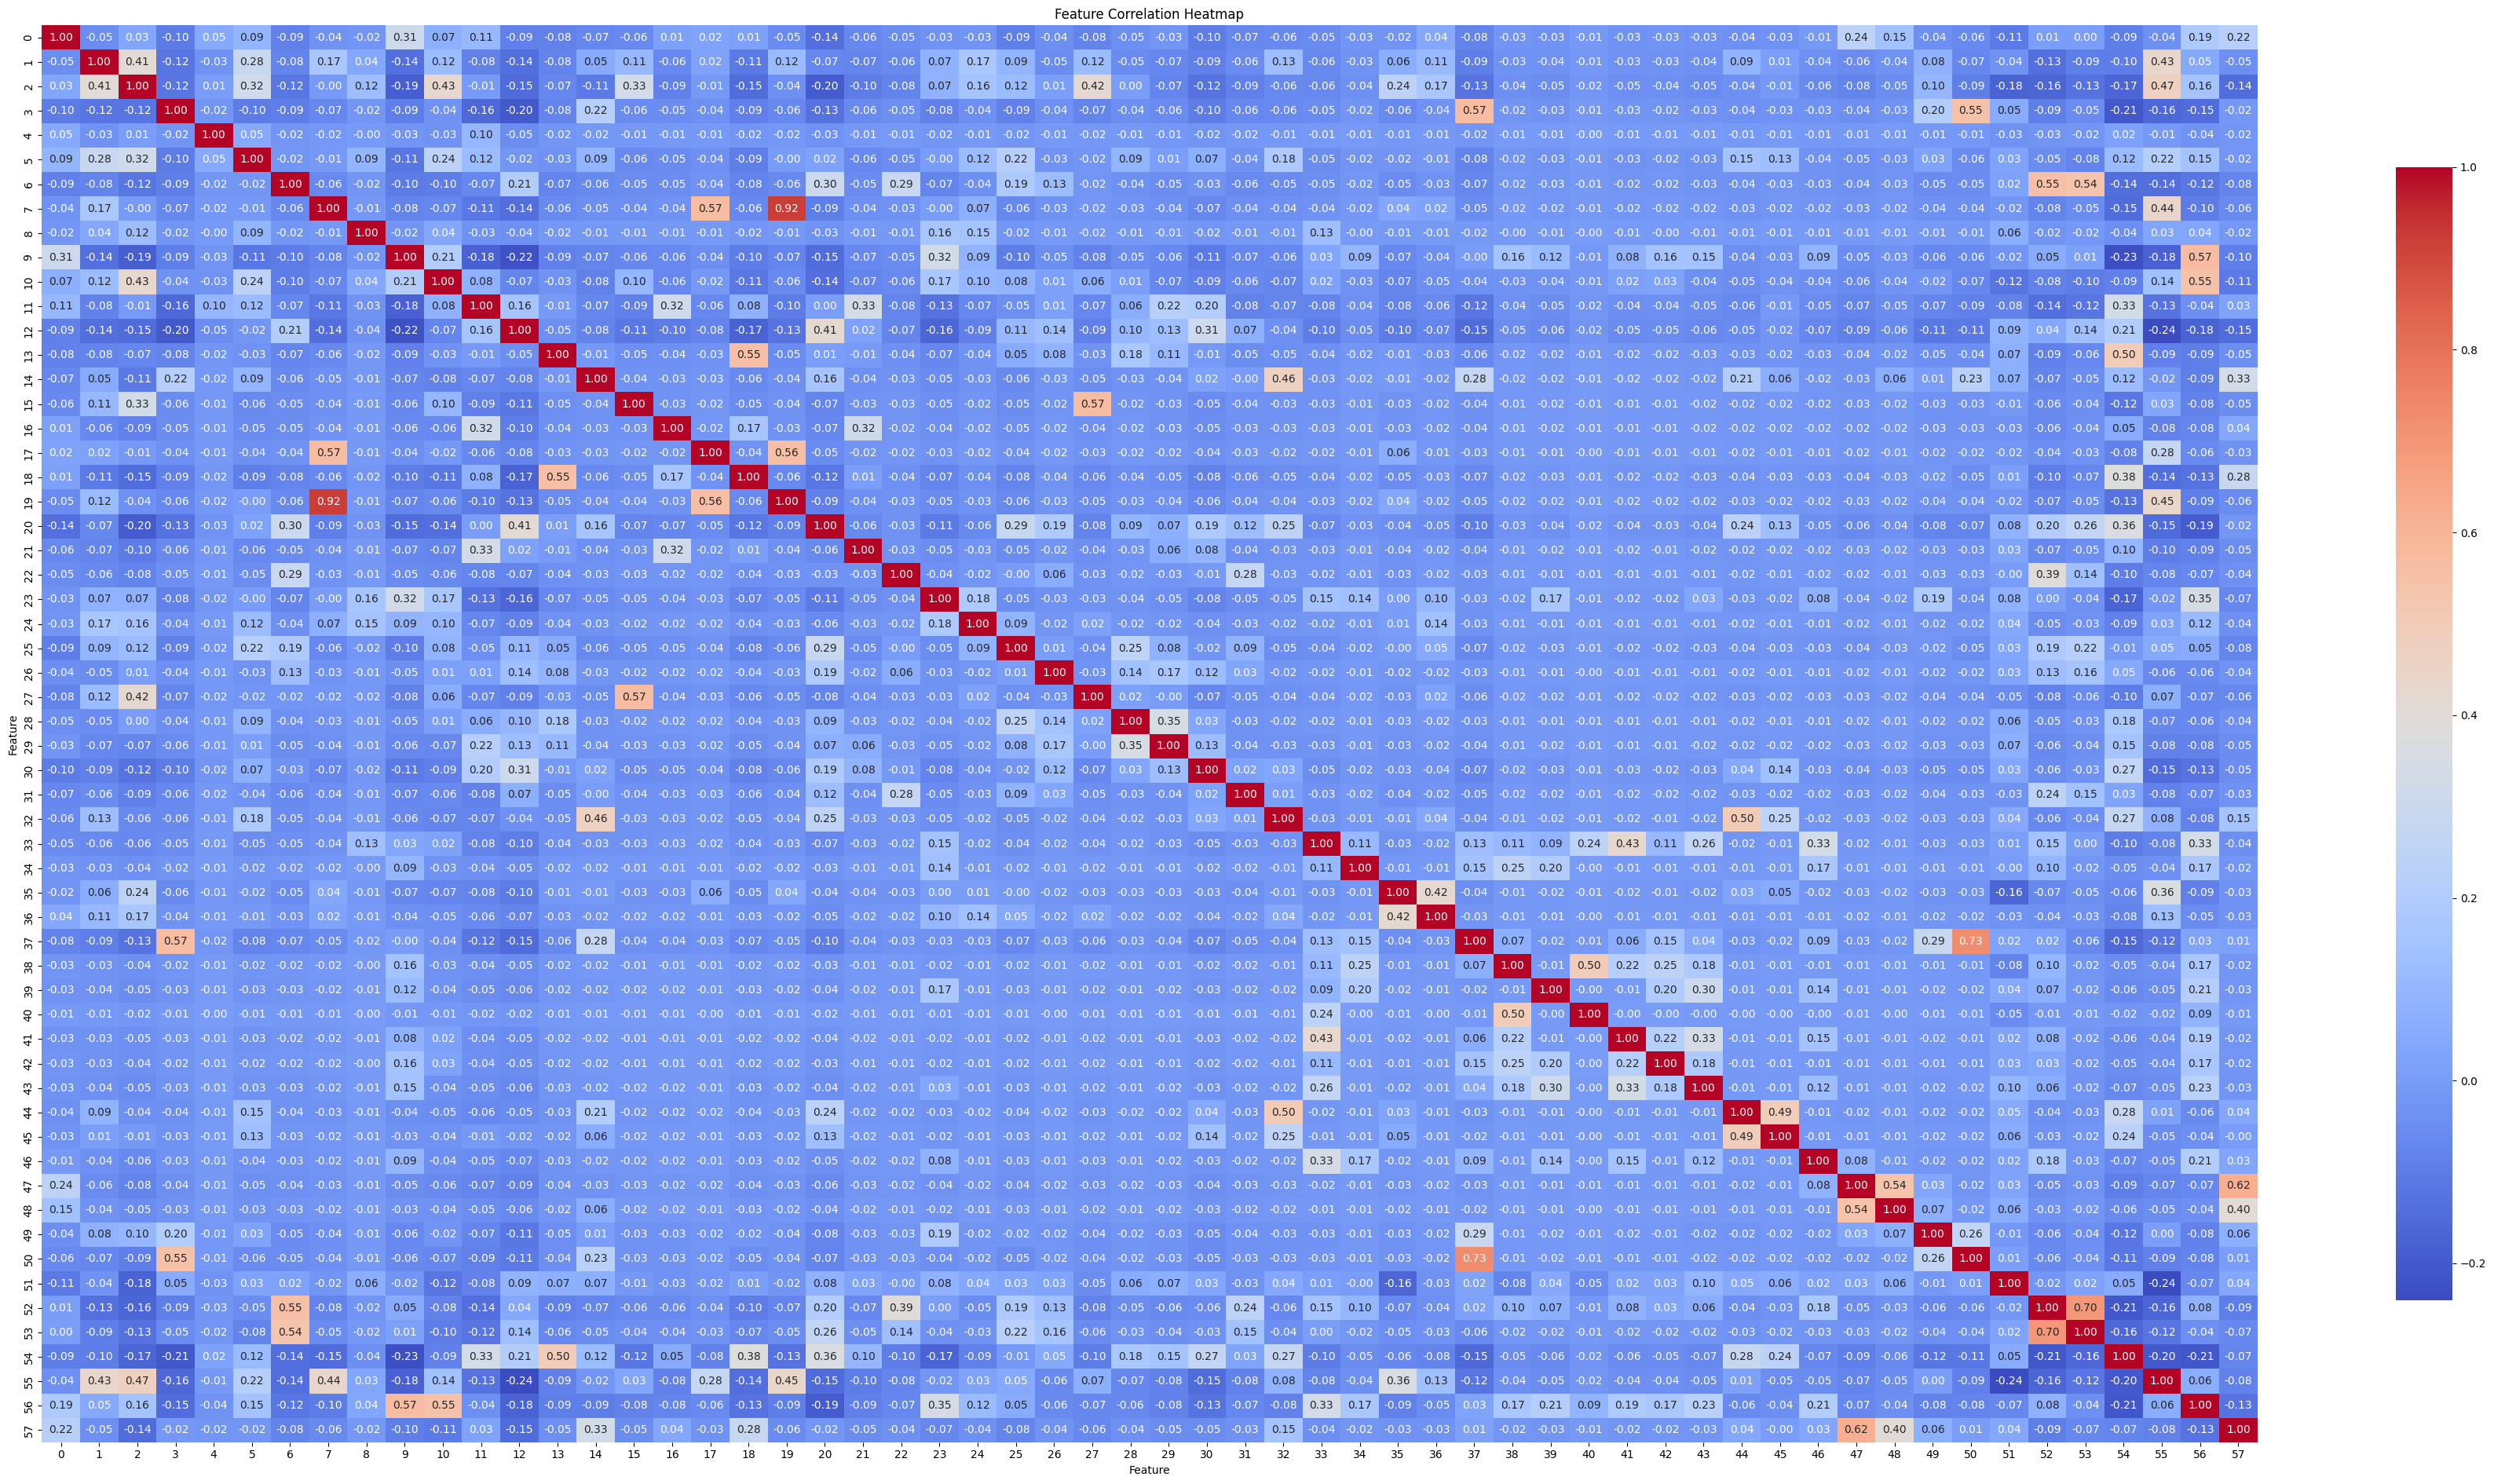

In [36]:
# Reshaping importances for heatmap
importances_heatmap = importances.reshape(1, -1)

indices = np.argsort(importances_heatmap)[::-1]  # Highest -> Last, Lowest -> First
# Plotting heatmap
plt.figure(figsize=(18, 5))
plt.imshow(importances_heatmap, cmap='hot', aspect='auto')
plt.colorbar(label='Feature Importance')
plt.xticks(ticks=np.arange(len(importances)), labels=np.arange(len(importances))+1)
# plt.xticks(range(X_train.shape[1]), 
#            feat_labels[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Heatmap')
plt.show()

correlation_matrix = np.corrcoef(X, rowvar=False)

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(36, 19))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

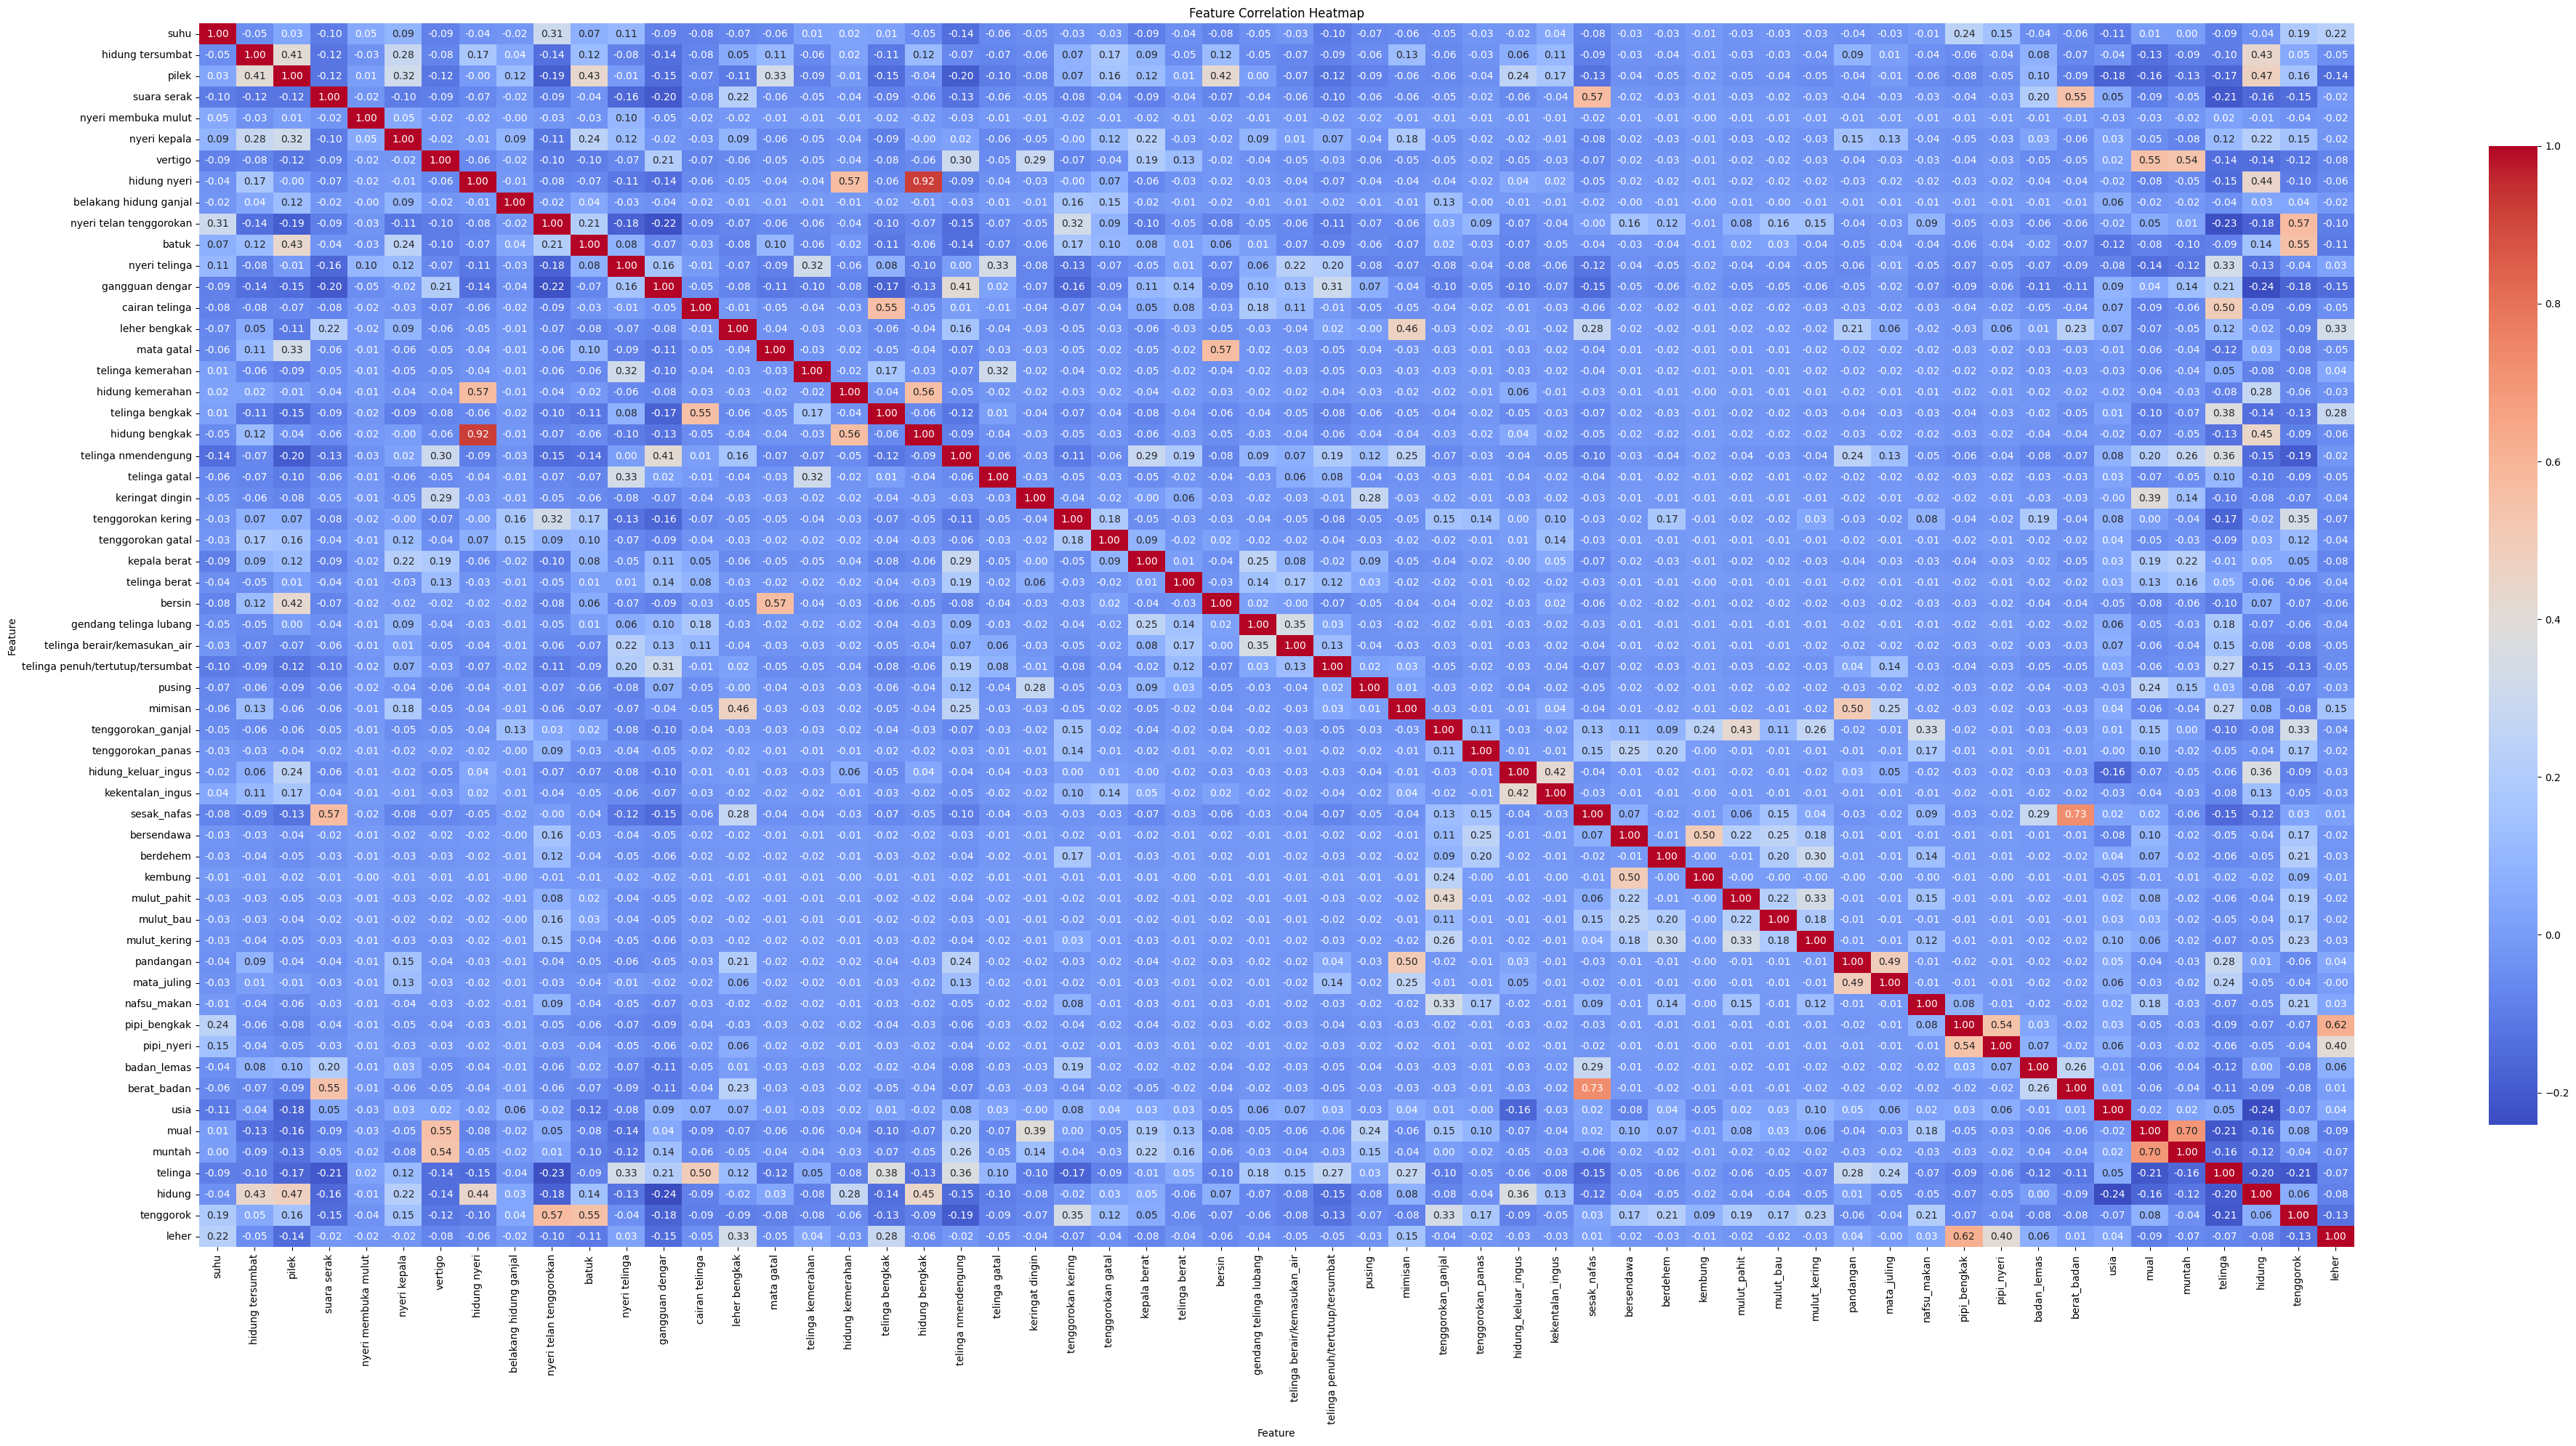

In [40]:
# Extracting feature names from the DataFrame
feature_names = vis_df.columns[:-1]  # Exclude the last column, which is the target variable

# Plotting feature correlation heatmap with wider size
plt.figure(figsize=(40, 20))  # Increase the figure width and height
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": 0.8},
            xticklabels=feature_names, yticklabels=feature_names)
plt.title('Feature Correlation Heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [32]:
Rforest = RandomForestClassifier(criterion="entropy", n_estimators=200, min_samples_split=2, min_samples_leaf=1)
Rforest.fit(StratX_train3, Straty_train3)
Rforest.score(StratX_train3, Straty_train3)

1.0

In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
class FeatureSelector:
    def __init__(self, estimator, n_features_to_select=None, step=1):
        self.estimator = estimator
        self.n_features_to_select = n_features_to_select
        self.step = step

    def fit(self, X, y, method='sfs'):
        n_features = X.shape[1]
        if self.n_features_to_select is None:
            self.n_features_to_select = n_features

        selected_features = set()
        remaining_features = set(range(n_features))

        if method == 'sfs':
            while len(selected_features) < self.n_features_to_select:
                best_feature = None
                best_score = -np.inf
                for feature in remaining_features:
                    current_features = list(selected_features) + [feature]
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score > best_score:
                        best_score = score
                        best_feature = feature

                if best_feature is not None:
                    selected_features.add(best_feature)
                    remaining_features.remove(best_feature)
                else:
                    break

        elif method == 'sbs':
            selected_features = set(range(n_features))
            while len(selected_features) > self.n_features_to_select:
                worst_feature = None
                worst_score = np.inf
                for feature in selected_features:
                    current_features = list(selected_features - {feature})
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score < worst_score:
                        worst_score = score
                        worst_feature = feature

                if worst_feature is not None:
                    selected_features.remove(worst_feature)
                else:
                    break

        self.selected_features_ = list(selected_features)

    def _evaluate_subset(self, X_subset, y):
        scores = cross_val_score(self.estimator, X_subset, y, cv=5)
        return np.mean(scores)
    
rf_classifier = RandomForestClassifier(n_estimators=100)
feature_selector = FeatureSelector(estimator=rf_classifier, n_features_to_select=5)
# Fit the FeatureSelector using Sequential Forward Selection (SFS) or Sequential Backward Selection (SBS)
feature_selector.fit(X_train2, y_train2, method='sfs')  # You can change the method to 'sbs' for backward selection
# Get the selected features
selected_features = feature_selector.selected_features_
print("Selected features:", selected_features)

Selected features: [20, 54, 55, 56, 57]


In [37]:
rf_classifier = RandomForestClassifier(n_estimators=100)
feature_selector = FeatureSelector(estimator=rf_classifier, n_features_to_select=5)
# Fit the FeatureSelector using Sequential Forward Selection (SFS) or Sequential Backward Selection (SBS)
feature_selector.fit(X_train2, y_train2, method='sbs')  # You can change the method to 'sbs' for backward selection
# Get the selected features
selected_features = feature_selector.selected_features_
print("Selected features:", selected_features)

Selected features: [8, 34, 36, 40, 42]


In [39]:
class FeatureSelector2:
    def __init__(self, estimator, feature_importances, step=1):
        self.estimator = estimator
        self.feature_importances = feature_importances
        self.step = step

    def fit(self, X, y, method='sfs'):
        n_features = X.shape[1]

        if method == 'sfs':
            n_features_to_select = self._determine_n_features_to_select(X, y)
            selected_features = set()
            remaining_features = set(range(n_features))
            while len(selected_features) < n_features_to_select:
                best_feature = None
                best_score = -np.inf
                for feature in remaining_features:
                    current_features = list(selected_features) + [feature]
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score > best_score:
                        best_score = score
                        best_feature = feature

                if best_feature is not None:
                    selected_features.add(best_feature)
                    remaining_features.remove(best_feature)
                else:
                    break

        elif method == 'sbs':
            n_features_to_select = self._determine_n_features_to_select(X, y)
            selected_features = set(range(n_features))
            while len(selected_features) > n_features_to_select:
                worst_feature = None
                worst_score = np.inf
                for feature in selected_features:
                    current_features = list(selected_features - {feature})
                    score = self._evaluate_subset(X[:, current_features], y)
                    if score < worst_score:
                        worst_score = score
                        worst_feature = feature

                if worst_feature is not None:
                    selected_features.remove(worst_feature)
                else:
                    break

        self.selected_features_ = list(selected_features)

    def _evaluate_subset(self, X_subset, y):
        scores = cross_val_score(self.estimator, X_subset, y, cv=5)
        return np.mean(scores)

    def _determine_n_features_to_select(self, X, y):
        feature_importance_indices = np.argsort(self.feature_importances)[::-1]
        cumulative_importance = np.cumsum(self.feature_importances[feature_importance_indices])
        threshold = 0.95 * cumulative_importance[-1]  # Select features contributing to 95% of importance
        n_features_to_select = np.argmax(cumulative_importance >= threshold) + 1
        return n_features_to_select

In [41]:
# rf_classifier = RandomForestClassifier(n_estimators=100)
feature_selector = FeatureSelector2(estimator=forest, feature_importances=importances)
# Fit the FeatureSelector using Sequential Forward Selection (SFS) or Sequential Backward Selection (SBS)
feature_selector.fit(X_train2, y_train2, method='sfs')  # You can change the method to 'sbs' for backward selection
# Get the selected features
selected_features = feature_selector.selected_features_
print("Selected features:", selected_features)

Selected features: [1, 2, 3, 4, 6, 10, 12, 17, 19, 22, 24, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 52, 53, 54, 55, 56, 57]


In [24]:
# akan memungkinkan tiap data untuk menampung nama dari data yang akan diuji satu persatu dengan tujuan untuk mengecek tiap akurasi data
filtered_df_list = []
for key, values in label_mapping.items():
    keyName = str(key)
    filtered_df = df[df['hasil_diagn_encoded'] == values]
    globals()['filtered_df_' + keyName] = filtered_df
    filtered_df_list.append('filtered_df_' + keyName)

In [25]:
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    print("Dataframe:", df_name)
    print(globals()[df_name])  # Access the dataframe using its name
    print()

Dataframe: filtered_df_barotrauma
     suhu  hidung_terseumbat  pilek  suara_serak  nyeri_membuka_mulut  \
460     0                  1      0            0                    0   
461     0                  1      0            0                    0   
462     0                  0      0            0                    0   
463     0                  0      0            0                    0   
464     0                  0      0            0                    0   
465     0                  0      0            0                    0   
466     0                  0      0            0                    0   
467     0                  0      0            0                    0   
468     0                  1      0            0                    0   
469     0                  1      0            0                    0   
470     0                  0      0            0                    0   
471     0                  0      0            0                    0   
472     0        

In [29]:
XFiltered_df = []
yFiltered_df = []
#untuk akses datanya pakai attribut global juga
for df_name in filtered_df_list:
    key = str(df_name)
    # Assuming the last column is the label/target column
    globals()['X_' + key] = globals()[df_name].drop("hasil_diagn_encoded", axis = 1)  # Features
    globals()['y_' + key] = globals()[df_name]['hasil_diagn_encoded']   # Labels
    XFiltered_df.append('X_' + key)
    yFiltered_df.append('y_' + key)

In [ ]:
for key in XFiltered_df:
    print(globals()[key])


In [ ]:
for key in yFiltered_df:
    print(globals()[key])

In [27]:
# hasil reverse value dengan key terhadap label_mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [30]:
for XKey, yKey in zip(XFiltered_df, yFiltered_df):
    print('Data :', XKey)
    predicted_output = forest.predict(globals()[XKey])
    predicted_output_keys = [reverse_label_mapping[value] for value in predicted_output]
    print("Predicted Output : ", predicted_output_keys)  

Data : X_filtered_df_barotrauma
Predicted Output :  ['barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'otisis_eksterna', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma', 'barotrauma']
Data : X_filtered_df_bppv
Predicted Output :  ['bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv', 'bppv']
Data : X_filtered_df_faringitis_akut
Predicted Output :  ['faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'faringitis_akut', 'farin

In [28]:
# Filter rows containing the specific data ("otisis_media")
# filtered_df = df[df['hasil_diagn_encoded'].str.contains('tonsilitsakut', na=False)]
filtered_df = df[df['hasil_diagn_encoded'] == 1]

# Print the filtered DataFrame
print(filtered_df)

     suhu  hidung_terseumbat  pilek  suara_serak  nyeri_membuka_mulut  \
340     0                  0      0            0                    0   
341     0                  0      0            0                    0   
342     0                  0      0            0                    0   
343     0                  0      0            0                    0   
344     0                  0      0            0                    0   
345     0                  0      0            0                    0   
346     0                  0      0            0                    0   
347     0                  0      0            0                    0   
348     0                  0      0            0                    0   
349     0                  0      0            0                    0   
350     0                  0      0            0                    0   
351     0                  0      0            0                    0   
352     0                  0      0            0   

In [34]:
from sklearn.model_selection import KFold

# Assuming X contains your feature matrix and y contains your target variable

# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Define the number of folds for cross-validation
k_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean cross-validation score: {mean_cv_score:.2f}")
print(f"Standard deviation of cross-validation scores: {std_cv_score:.2f}")

Cross-validation scores: [0.96428571 0.97857143 0.97142857 0.95714286 0.94285714]
Mean cross-validation score: 0.96
Standard deviation of cross-validation scores: 0.01


In [35]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
88 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 888}
Best Score: 0.9589285714285716


In [36]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train3, y_train3)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
159 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best Parameters: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 512}
Best Score: 0.9510204081632654


In [37]:
# Random Search Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 1000),  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
    'max_depth': randint(10, 100),       # Maximum number of levels in tree
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)   # Minimum number of samples required at each leaf node
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42,
                                   n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train4, y_train4)  # Replace X_train and y_train with your training data

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Print the best score found
print("Best Score:", random_search.best_score_)

c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\SHERLY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best Parameters: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 512}
Best Score: 0.9452380952380952


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
# Compute evaluation metrics for each class
accuracy = accuracy_score(Straty_test, y_pred)
precision = precision_score(Straty_test, y_pred, average=None)
recall = recall_score(Straty_test, y_pred, average=None)
f1 = f1_score(Straty_test, y_pred, average=None)

In [48]:
accuracy3 = accuracy_score(Straty_test3, y_pred3)
precision3 = precision_score(Straty_test3, y_pred3, average=None)
recall3 = recall_score(Straty_test3, y_pred3, average=None)
f13 = f1_score(Straty_test3, y_pred3, average=None)

In [49]:
accuracy4 = accuracy_score(Straty_test4, y_pred4)
precision4 = precision_score(Straty_test4, y_pred4, average=None)
recall4 = recall_score(Straty_test4, y_pred4, average=None)
f14 = f1_score(Straty_test4, y_pred4, average=None)

In [50]:
# Print evaluation metrics
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

Accuracy: 0.9714285714285714
Precision: [1.         1.         0.9        1.         1.         1.
 1.         1.         0.9        1.         1.         0.9
 1.         1.         0.81818182 1.         1.         1.
 1.         1.         0.9        1.         1.        ]
Recall: [1.         1.         1.         1.         0.88888889 1.
 1.         0.88888889 1.         1.         0.77777778 1.
 0.88888889 1.         1.         1.         0.88888889 1.
 1.         1.         1.         1.         1.        ]
F1 Score: [1.         1.         0.94736842 1.         0.94117647 1.
 1.         0.94117647 0.94736842 1.         0.875      0.94736842
 0.94117647 1.         0.9        1.         0.94117647 1.
 1.         1.         0.94736842 1.         1.        ]


In [51]:
# Print evaluation metrics
print("Accuracy:", accuracy4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)

Accuracy: 0.9571428571428572
Precision: [1.         1.         0.85714286 1.         1.         1.
 1.         1.         0.92307692 1.         1.         0.92307692
 1.         1.         0.85714286 1.         1.         1.
 0.85714286 0.86666667 0.92307692 1.         0.92307692]
Recall: [0.66666667 1.         1.         1.         0.91666667 1.
 1.         0.83333333 1.         1.         0.83333333 1.
 0.91666667 1.         1.         1.         0.83333333 1.
 1.         1.         1.         1.         1.        ]
F1 Score: [0.8        1.         0.92307692 1.         0.95652174 1.
 1.         0.90909091 0.96       1.         0.90909091 0.96
 0.95652174 1.         0.92307692 1.         0.90909091 1.
 0.92307692 0.92857143 0.96       1.         0.96      ]


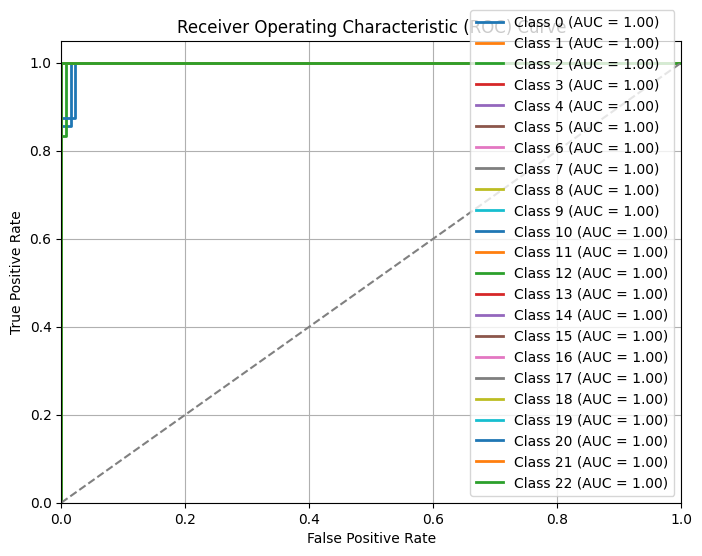

Accuracy: 0.9714285714285714
Precision: [1.         1.         0.85714286 1.         1.         1.
 1.         1.         1.         1.         1.         0.85714286
 1.         1.         0.75       1.         1.         1.
 1.         1.         1.         1.         1.        ]
Recall: [1.         1.         1.         1.         1.         1.
 1.         0.83333333 1.         1.         0.66666667 1.
 0.83333333 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
F1 Score: [1.         1.         0.92307692 1.         1.         1.
 1.         0.90909091 1.         1.         0.8        0.92307692
 0.90909091 1.         0.85714286 1.         1.         1.
 1.         1.         1.         1.         1.        ]


In [52]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), forest.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)